<a href="https://colab.research.google.com/github/ctshiz/Econometrics/blob/main/Heteroskedasticity_in_Housing_Price_Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [8]:
df = pd.read_excel("/content/wage1.xls", header=None, sheet_name=1)
df1 = df[[0,3,4,2]]
df1.rename(columns={0:"price", 3:"lotsize", 4:"sqrft", 2:"bdrms"}, inplace=True)
df1.head()

<ipython-input-8-e495098ebc16>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={0:"price", 3:"lotsize", 4:"sqrft", 2:"bdrms"}, inplace=True)


,price,lotsize,sqrft,bdrms
0,300.0,6126,2438,4
1,370.0,9903,2076,3
2,191.0,5200,1374,3
3,195.0,4600,1448,3
4,373.0,6095,2514,4


In [9]:
Y = df1['price']
X = df1.drop("price", axis=1)

#train the model
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     57.46
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           2.70e-20
Time:                        19:22:55   Log-Likelihood:                -482.88
No. Observations:                  88   AIC:                             973.8
Df Residuals:                      84   BIC:                             983.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.7703     29.475     -0.739      0.4

**Heteroskedasticity**

Method 1: using the plot of error against actual price

<ipython-input-50-e84ad7666a49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted_price'] = -21.7703 + 0.0021*df1['lotsize'] + 0.1228* df1['sqrft'] + 13.8525*df1['bdrms']
<ipython-input-50-e84ad7666a49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['error'] = df1['price'] - df1['predicted_price']


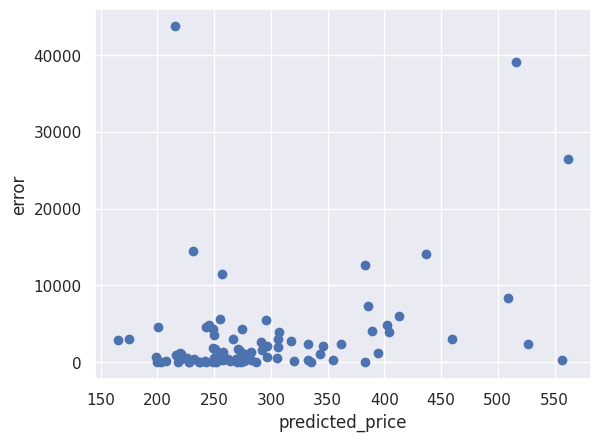

In [50]:
#compute the predicted price
df1['predicted_price'] = -21.7703 + 0.0021*df1['lotsize'] + 0.1228* df1['sqrft'] + 13.8525*df1['bdrms']
df1['error'] = df1['price'] - df1['predicted_price']

#plot the error against the actual price
plt.scatter(df1['predicted_price'], df1['error']**2)
plt.xlabel("predicted_price")
plt.ylabel("error")
plt.show()

Method 2: using the regression of the squared OLS residuals on the independent variables

In [20]:
df1.columns

Index(['price', 'lotsize', 'sqrft', 'bdrms', 'predicted_price', 'error'], dtype='object')

In [28]:
def train_model(data, output):
  Y = data[output]
  X = data.drop(output, axis=1)

  #train the model
  X = sm.add_constant(X)
  model = sm.OLS(Y,X).fit()
  return model.summary()

df1['sqr_error'] = df1['error']**2
df2 = df1.drop(["price", "predicted_price","error"], axis=1)
print(train_model(df2, 'sqr_error'))

                            OLS Regression Results                            
Dep. Variable:              sqr_error   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     5.513
Date:                Wed, 19 Jun 2024   Prob (F-statistic):            0.00166
Time:                        19:46:20   Log-Likelihood:                -896.39
No. Observations:                  88   AIC:                             1801.
Df Residuals:                      84   BIC:                             1811.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5469.9833   3237.481     -1.690      0.0

<ipython-input-28-69bb954f8c16>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sqr_error'] = df1['error']**2


Reject the null hypothesis of homoskedasticity (Prob (F-statistic):0.00166 < 0.05). So heteroskedasticity is present.

**Dealing with Heteroskedasticity**

In [41]:
#df1#.drop(["sqr_error", 'predicted_price', 'error'], axis=1, inplace=True)
df1.head()
df3 = df1.copy()

df3['log_price'] = np.log(df3['price'])
df3['log_lotsize'] = np.log(df3['lotsize'])
df3['log_sqrft'] = np.log(df3['sqrft'])

df3.drop(["price", "lotsize", "sqrft"], axis=1, inplace=True)

print(train_model(df3, 'log_price'))

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     50.42
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           9.74e-19
Time:                        20:02:26   Log-Likelihood:                 25.861
No. Observations:                  88   AIC:                            -43.72
Df Residuals:                      84   BIC:                            -33.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.2970      0.651     -1.992      

In [42]:
#using method 2 to assess the presence of heteroskedasticity

df3['predict_log_price'] = -1.2970 + 0.1680*df3['log_lotsize'] + 0.7002*df3['log_sqrft'] + 0.0370*df3['bdrms']
df3['error'] = df3['log_price'] - df3['predict_log_price']
df3['sqr_error'] = df3['error']**2
df3.drop(["log_price", "predict_log_price", "error"], axis=1, inplace=True)

print(train_model(df3, 'sqr_error'))

                            OLS Regression Results                            
Dep. Variable:              sqr_error   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.411
Date:                Wed, 19 Jun 2024   Prob (F-statistic):              0.245
Time:                        20:02:33   Log-Likelihood:                 107.38
No. Observations:                  88   AIC:                            -206.8
Df Residuals:                      84   BIC:                            -196.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5100      0.258      1.978      

Fail to reject the null hypothesis of homoskedasticity (Prob (F-statistic):0.245 > 0.05).